In [5]:
!kaggle datasets list -s "Home Depot"
!kaggle datasets download -d "hngtrnkhnh/home-depot-product-search-relevance"

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedevastator/the-home-depot-products-dataset                   The Home Depot Products Dataset                       1MB  2022-10-04 07:08:04            728         20  1.0              
erichschulman/home-improvement-stores                           Locations of Home Improvement Stores                  9MB  2022-05-10 02:37:45            377          5  1.0              
crawlfeeds/the-home-depot-products-dataset                      The Home Depot products dataset                       2MB  2021-12-13 20:03:15            200          6  0.9411765        
polartech/5000-home-depot-water-heater-skus                 


  0%|          | 0.00/73.7M [00:00<?, ?B/s]
  3%|2         | 2.00M/73.7M [00:00<00:04, 17.0MB/s]
  7%|6         | 5.00M/73.7M [00:00<00:03, 21.7MB/s]
 12%|#2        | 9.00M/73.7M [00:00<00:02, 29.3MB/s]
 16%|#6        | 12.0M/73.7M [00:00<00:02, 25.7MB/s]
 23%|##3       | 17.0M/73.7M [00:00<00:01, 32.2MB/s]
 28%|##8       | 21.0M/73.7M [00:00<00:02, 24.6MB/s]
 35%|###5      | 26.0M/73.7M [00:00<00:01, 29.5MB/s]
 42%|####2     | 31.0M/73.7M [00:01<00:01, 34.1MB/s]
 49%|####8     | 36.0M/73.7M [00:01<00:01, 34.6MB/s]
 56%|#####5    | 41.0M/73.7M [00:01<00:00, 35.0MB/s]
 61%|######1   | 45.0M/73.7M [00:01<00:01, 29.2MB/s]
 68%|######7   | 50.0M/73.7M [00:01<00:00, 28.3MB/s]
 76%|#######5  | 56.0M/73.7M [00:01<00:00, 34.2MB/s]
 81%|########1 | 60.0M/73.7M [00:02<00:00, 31.6MB/s]
 88%|########8 | 65.0M/73.7M [00:02<00:00, 29.5MB/s]
 98%|#########7| 72.0M/73.7M [00:02<00:00, 37.4MB/s]
100%|##########| 73.7M/73.7M [00:02<00:00, 31.9MB/s]


In [3]:
import os
os.getcwd()
# os.chdir(default_path)

'C:\\Users\\hanjh\\Desktop\\Kaggle project\\Recommend & Predict'

In [ ]:
import zipfile 
with zipfile.ZipFile("home-depot-product-search-relevance.zip", 'r') as file:
    file.extractall('home_depot')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold, StratifiedKFold
from iterstrat.ml_stratifiers import RepeatedMultilabelStratifiedKFold
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelBinarizer, label_binarize
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from summarytools import dfSummary
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings(action='ignore')

#### Overview 

Shoppers rely on Home Depot’s product authority to find and buy the latest products and to get timely solutions to their home improvement needs. From installing a new ceiling fan to remodeling an entire kitchen, with the click of a mouse or tap of the screen, customers expect the correct results to their queries – quickly. Speed, accuracy and delivering a frictionless customer experience are essential.

***In this competition, Home Depot is asking Kagglers to help them improve their customers' shopping experience by developing a model that can accurately predict the relevance of search results.***

Search relevancy is an implicit measure Home Depot uses to gauge how quickly they can get customers to the right products. Currently, human raters evaluate the impact of potential changes to their search algorithms, which is a slow and subjective process. By removing or minimizing human input in search relevance evaluation, Home Depot hopes to increase the number of iterations their team can perform on the current search algorithms.


#### Data description¶
This data set contains a number of products and real customer search terms from Home Depot's website. The challenge is to predict a relevance score for the provided combinations of search terms and products. To create the ground truth labels, Home Depot has crowdsourced the search/product pairs to multiple human raters.

The relevance is a number between 1 (not relevant) to 3 (highly relevant). For example, a search for "AA battery" would be considered highly relevant to a pack of size AA batteries (relevance = 3), mildly relevant to a cordless drill battery (relevance = 2), and not relevant to a snow shovel (relevance = 1).

Each pair was evaluated by at least three human raters. The provided relevance scores are the average value of the ratings. There are three additional things to know about the ratings:

The specific instructions given to the raters is provided in relevance_instructions.docx. Raters did not have access to the attributes. Raters had access to product images, while the competition does not include images. Your task is to predict the relevance for each pair listed in the test set. Note that the test set contains both seen and unseen search terms.

#### File descriptions
- train.csv - the training set, contains products, searches, and relevance scores
- test.csv - the test set, contains products and searches. You must predict the relevance for these pairs.
- product_descriptions.csv - contains a text description of each product. You may join this table to the training or test set via the product_uid.
- attributes.csv - provides extended information about a subset of the products (typically representing detailed technical specifications). Not every - product will have attributes.
- sample_submission.csv - a file showing the correct submission format
- relevance_instructions.docx - the instructions provided to human raters

#### Data fields
- id - a unique Id field which represents a (search_term, product_uid) pair
- product_uid - an id for the products
- product_title - the product title
- product_description - the text description of the product (may contain HTML content)
- search_term - the search query
- relevance - the average of the relevance ratings for a given id
- name - an attribute name
- value - the attribute's value

In [56]:
train_df = pd.read_csv("home_depot\\train.csv", encoding="ISO-8859-1")
test_df = pd.read_csv("home_depot\\test.csv", encoding="ISO-8859-1")
attr_df = pd.read_csv('home_depot\\attributes.csv')
desc_df = pd.read_csv('home_depot\\product_descriptions.csv')
sample = pd.read_csv('home_depot\\sample_submission.csv')

In [57]:
print("Training Data:")
display(train_df.head())
print("\nTesting Data:")
display(test_df.head())
print("\nAttributes Data:")
display(attr_df.head())
print("\nDescriptions Data:")
display(desc_df.head())

Training Data:


,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67



Testing Data:


,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668



Attributes Data:


,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel



Descriptions Data:


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [58]:
print("training data has empty values:",train_df.isnull().values.any())
print("testing data has empty values:",test_df.isnull().values.any())
print("attribute data has empty values:",attr_df.isnull().values.any())
print("description data has empty values:",desc_df.isnull().values.any())

training data has empty values: False
testing data has empty values: False
attribute data has empty values: True
description data has empty values: False


In [59]:
print("there are in total {} id ".format(len(train_df.id.unique())))
print("there are in total {} products_uid ".format(len(train_df.product_uid.unique())))
print("there are in total {} products title ".format(len(train_df.product_title.unique())))
print("there are in total {} search query ".format(len(train_df.search_term.unique())))

there are in total 74067 id 
there are in total 54667 products_uid 
there are in total 53489 products title 
there are in total 11795 search query 


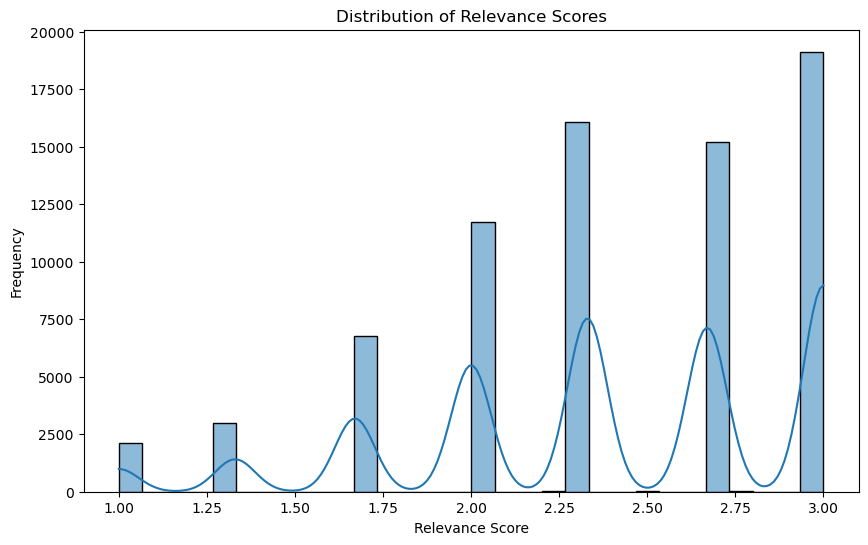

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['relevance'], bins=30, kde=True)
plt.title('Distribution of Relevance Scores')
plt.xlabel('Relevance Score')
plt.ylabel('Frequency')
plt.show()

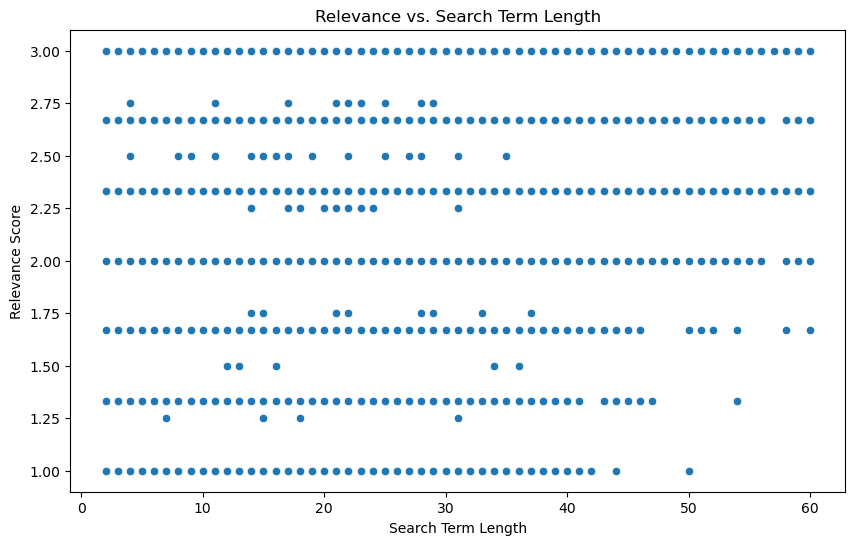

In [61]:
# Explore the relationship between relevance and the length of the search term
train_df['search_term_length'] = train_df['search_term'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='search_term_length', y='relevance', data=train_df)
plt.title('Relevance vs. Search Term Length')
plt.xlabel('Search Term Length')
plt.ylabel('Relevance Score')
plt.show()

### Method 1.
#### Random Forest by using nltk.stem library

In [63]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
num_train = train_df.shape[0]

def str_stemmer(s):
	return " ".join([stemmer.stem(word) for word in s.lower().split()])

def str_common_word(str1, str2):
	return sum(int(str2.find(word)>=0) for word in str1.split())

df_all = pd.concat((train_df, test_df), axis=0, ignore_index=True)
df_all = pd.merge(df_all, desc_df, how='left', on='product_uid')

In [64]:
df_all['search_term_stem'] = df_all['search_term'].map(lambda x:str_stemmer(x))
df_all['product_title_stem'] = df_all['product_title'].map(lambda x:str_stemmer(x))
df_all['product_description_stem'] = df_all['product_description'].map(lambda x:str_stemmer(x))

In [65]:
df_all.query('search_term != search_term_stem').head()

,id,product_uid,product_title,search_term,relevance,search_term_length,product_description,search_term_stem,product_title_stem,product_description_stem
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,13.0,"Not only do angles make joints stronger, they ...",angl bracket,simpson strong-ti 12-gaug angl,"not onli do angl make joint stronger, they als..."
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,18.0,Update your bathroom with the Delta Vero Singl...,shower onli faucet,delta vero 1-handl shower onli faucet trim kit...,updat your bathroom with the delta vero single...
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,14.0,Achieving delicious results is almost effortle...,convect otr,whirlpool 1.9 cu. ft. over the rang convect mi...,achiev delici result is almost effortless with...
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,20.0,Achieving delicious results is almost effortle...,microwav over stove,whirlpool 1.9 cu. ft. over the rang convect mi...,achiev delici result is almost effortless with...
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,10.0,Achieving delicious results is almost effortle...,microwav,whirlpool 1.9 cu. ft. over the rang convect mi...,achiev delici result is almost effortless with...


In [66]:
df_all['len_search_term'] = df_all['search_term_stem'].map(lambda x:len(x.split())).astype(np.int64)
df_all['product_info'] = df_all['search_term_stem']+"\t"+df_all['product_title_stem']+"\t"+df_all['product_description_stem']

In [67]:
df_all['search_term_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['search_term_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))

In [68]:
df_new = df_all.drop(['search_term', 'search_term_stem','product_title', 'product_title_stem', 
                      'product_description', 'product_description_stem', 'product_info'],axis=1)

In [69]:
df_train = df_new.iloc[:num_train]
df_test = df_new.iloc[num_train:]
id_test = df_test['id']

In [70]:
df_train.head()

,id,product_uid,relevance,search_term_length,len_search_term,search_term_in_title,search_term_in_description
0,2,100001,3.00,13.0,2,1,1
1,3,100001,2.50,9.0,2,1,1
2,9,100002,3.00,9.0,2,1,1
3,16,100005,2.33,16.0,3,1,1
4,17,100005,2.67,18.0,3,3,2


In [71]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X = df_train.drop(['id','relevance'],axis=1)
y = df_train['relevance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
X_train.head()

,term_desc,term_att,term_title,term_sum_overlaps,term_length,ratio_title_len,ratio_overlaps_len
9558,0,0,0,0,3,0.0,0.00
35894,3,0,0,3,3,0.0,1.00
47152,0,0,0,0,3,0.0,0.00
37545,2,0,0,2,3,0.0,0.67
9548,0,0,0,0,2,0.0,0.00


In [72]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(estimator=rf, n_estimators=45, max_samples=0.1, random_state=25)

# Fit the model using the training data
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Evaluate performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate R² score
r2 = r2_score(y_test, y_pred)

In [73]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 0.22886330632161148
Root Mean Squared Error (RMSE): 0.4783965994043138
R² Score: 0.1926536763513248


### Method 2
#### Feature Engineering - find overlaps of search terms words in description and attribute

In [75]:
attr_df['attribute_string']=attr_df['name'].map(str)+' '+attr_df['value'].map(str)
attr=pd.pivot_table(attr_df,index=['product_uid'],values=['attribute_string'], aggfunc=lambda x: ' '.join(x))
attr.head()

,attribute_string
product_uid,
100001.0,Bullet01 Versatile connector for various 90° c...
100002.0,"Application Method Brush,Roller,Spray Assemble..."
100003.0,Built-in flange Yes Bullet01 Slightly narrower...
100004.0,Amperage (amps) 8.56 Bullet01 Positive power t...
100005.0,Bath Faucet Type Combo Tub and Shower Built-in...


In [76]:
train=pd.merge(train_df, desc_df, how='left', on='product_uid')
train=pd.merge(train, attr, how='left', on='product_uid')
train.head()

,id,product_uid,product_title,search_term,relevance,search_term_length,product_description,attribute_string
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,13,"Not only do angles make joints stronger, they ...",Bullet01 Versatile connector for various 90° c...
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,9,"Not only do angles make joints stronger, they ...",Bullet01 Versatile connector for various 90° c...
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,9,BEHR Premium Textured DECKOVER is an innovativ...,"Application Method Brush,Roller,Spray Assemble..."
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,16,Update your bathroom with the Delta Vero Singl...,Bath Faucet Type Combo Tub and Shower Built-in...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,18,Update your bathroom with the Delta Vero Singl...,Bath Faucet Type Combo Tub and Shower Built-in...


In [77]:
train['attribute_string'] = train['attribute_string'].replace(np.nan, '', regex=True)
train['term_desc'] = [len(set(a.split()) & set(b.split())) for a, b in zip(train.search_term, train.product_description)]
train['term_att'] = [len(set(a.split()) & set(b.split())) for a, b in zip(train.search_term, train.attribute_string)]
train['term_title'] = [len(set(a.split()) & set(b.split())) for a, b in zip(train.search_term, train.product_title)]
#calculate ratios here
train['term_sum_overlaps']=train['term_desc']+train['term_att']+train['term_title']
train['term_length']=[len(a.split()) for a in train['search_term']]
train['ratio_title_len']=train['term_title']/train['term_length']
train['ratio_overlaps_len']=round(train['term_sum_overlaps']/train['term_length'],2)

In [78]:
train.head()

,id,product_uid,product_title,search_term,relevance,search_term_length,product_description,attribute_string,term_desc,term_att,term_title,term_sum_overlaps,term_length,ratio_title_len,ratio_overlaps_len
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,13,"Not only do angles make joints stronger, they ...",Bullet01 Versatile connector for various 90° c...,0,0,0,0,2,0.0,0.0
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,9,"Not only do angles make joints stronger, they ...",Bullet01 Versatile connector for various 90° c...,0,0,0,0,2,0.0,0.0
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,9,BEHR Premium Textured DECKOVER is an innovativ...,"Application Method Brush,Roller,Spray Assemble...",0,0,0,0,2,0.0,0.0
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,16,Update your bathroom with the Delta Vero Singl...,Bath Faucet Type Combo Tub and Shower Built-in...,0,0,0,0,3,0.0,0.0
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,18,Update your bathroom with the Delta Vero Singl...,Bath Faucet Type Combo Tub and Shower Built-in...,0,0,0,0,3,0.0,0.0


In [79]:
#trim dataframes to just the usable features
X= train[['term_desc','term_att','term_title', 'term_sum_overlaps', 'term_length', 'ratio_title_len', 'ratio_overlaps_len']]
y= train['relevance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train.head()

,term_desc,term_att,term_title,term_sum_overlaps,term_length,ratio_title_len,ratio_overlaps_len
9558,0,0,0,0,3,0.0,0.00
35894,3,0,0,3,3,0.0,1.00
47152,0,0,0,0,3,0.0,0.00
37545,2,0,0,2,3,0.0,0.67
9548,0,0,0,0,2,0.0,0.00


In [80]:
from sklearn.linear_model import Ridge

rg= Ridge(alpha=.1)
rg.fit(X_train, y_train.values.ravel())
y_pred = rg.predict(X_test)
rg_mse = mean_squared_error(y_pred, y_test)
rg_rmse = np.sqrt(rg_mse)
print('Ridge RMSE: %.4f' % rg_rmse)

Ridge RMSE: 0.5218


In [81]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid with valid loss values
param_grid = {
    'loss': ['squared_error', 'huber', 'absolute_error', 'quantile'],
    'n_estimators': [3, 5, 10], 
    'max_depth': [5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Set up GridSearchCV
model_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=-1, error_score='raise')

# Fit the model to the training data
model_gbr.fit(X_train, y_train)

# Predict on the test data
y_pred = model_gbr.predict(X_test)

# Evaluate the model performance
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)

print(f'GB Regressor RMSE: {gb_rmse:.4f}')

GB Regressor RMSE: 0.5187


In [82]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
param_grid = {'max_depth':[5, 6], 
              'n_estimators': [130, 150, 170], 
              'learning_rate' : [0.1]}
model_xgb = sklearn.model_selection.GridSearchCV(estimator = xgb, param_grid = param_grid, n_jobs = -1)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
xgb_mse = mean_squared_error(y_pred, y_test)
xgb_rmse = np.sqrt(xgb_mse)
print('XGB Regressor RMSE: %.4f' % xgb_rmse)

XGB Regressor RMSE: 0.5169


### Recommendation System - Collaborative filtering system (using Utility Matrix)

Utility Matrix : An utlity matrix is consists of all possible user-item preferences details represented as a matrix. The utility matrix is sparce as none of the users would buy alltheh items in the list, hence, most of the values are unknown.
A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.ne.

In [21]:
# Option 1: Drop rows with missing values
train_df.dropna(subset=['id', 'product_uid', 'relevance'], inplace=True)

# Option 2: Fill missing 'relevance' values with a default (e.g., 0)
train_df['relevance'].fillna(0, inplace=True)

# train_df['id'] = train_df['id'].astype(str)
# train_df['product_uid'] = train_df['product_uid'].astype(str)
# print(train_df[['id', 'product_uid', 'relevance']].dtypes)

In [23]:
train_df_sample = train_df.sample(30000, random_state=42)

# Try the pivot operation on the smaller subset
train_df_utility_matrix = train_df_sample.pivot_table(values='relevance', index='id', columns='product_uid', fill_value=0)

In [63]:
X = train_df_utility_matrix.T
X.head()

id,2,17,20,21,35,37,88,92,122,123,...,221401,221404,221405,221413,221416,221426,221432,221443,221457,221463
product_uid,,,,,,,,,,,,,,,,,,,,,
100001,3.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,0.0,2.67,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0.0,0.00,2.67,3.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100011,0.0,0.00,0.00,0.0,3.0,3.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100019,0.0,0.00,0.00,0.0,0.0,0.0,1.33,2.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import sklearn
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(25824, 10)

In [ ]:
df = pd.DataFrame(decomposed_matrix, columns=['singular_1', 'singular_2', 'singular_3', 'singular_4',
                                              'singular_5', 'singular_6', 'singular_7', 'singular_8',
                                              'singular_9', 'singular_10',])
df.head()

In [43]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        , -0.16348729,  0.21162353, ..., -0.74169749,
         0.33108721, -0.2555887 ],
       [-0.16348729,  1.        ,  0.32796123, ...,  0.18357444,
        -0.47584005,  0.06357147],
       [ 0.21162353,  0.32796123,  1.        , ...,  0.06259974,
         0.41229575,  0.06042701],
       ...,
       [-0.74169749,  0.18357444,  0.06259974, ...,  1.        ,
        -0.01476705,  0.40682189],
       [ 0.33108721, -0.47584005,  0.41229575, ..., -0.01476705,
         1.        ,  0.1614278 ],
       [-0.2555887 ,  0.06357147,  0.06042701, ...,  0.40682189,
         0.1614278 ,  1.        ]])

In [65]:
 # product_id = '100225'
i = X.index[99]
product_names = list(X.index)
product_uid = product_names.index(i)
product_uid

99

In [67]:
correlation_product_ID = correlation_matrix[product_uid]
correlation_product_ID.shape

(25824,)

In [86]:
# Convert the NumPy array to a Pandas Series
correlation_series = pd.Series(correlation_product_ID)
# Sort the values
correlation_series.sort_values(ascending=False).head(40)

99       1.000000
6139     0.972091
2152     0.967731
9782     0.953193
18729    0.951660
9105     0.948321
18246    0.946568
23221    0.942682
23733    0.942007
23260    0.939329
8115     0.938296
20951    0.937219
21846    0.937181
12211    0.936544
13209    0.933304
6771     0.932548
14562    0.932218
10615    0.931793
18399    0.930779
1481     0.929077
20138    0.928944
7744     0.927669
21787    0.926912
16238    0.926092
17066    0.925061
826      0.924507
7235     0.923545
1165     0.922303
1653     0.922161
21437    0.920865
6547     0.920767
24128    0.919711
7136     0.917821
22205    0.914332
23316    0.914073
24315    0.912898
1391     0.911443
961      0.910384
25784    0.909714
11774    0.909677
dtype: float64

In [69]:
Recommend = list(X.index[correlation_product_ID > 0.90])
# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

[101710, 102032, 102484, 102990, 103207, 103610, 105068, 105424, 107539]